# Predicting numeric values: regression

### 8.1 Finding best-fit lines with linear regression

In [1]:
import numpy as np

def loadDataSet(fileName):
    """
    数据集加载函数
    :param fileName: 文件名
    :return: 特征矩阵和标签向量
    """
    dataMat = []
    labelMat = []
    
    with open(fileName) as fr:
        for line in fr.readlines():
            lineArr = line.strip().split('\t')
            dataMat.append([float(x) for x in lineArr[:-1]])
            labelMat.append(float(lineArr[-1]))
    
    return np.array(dataMat), np.array(labelMat)

In [2]:
def standRegress(xArr, yArr):
    """
    标准线性回归函数
    :param xArr: 特征矩阵
    :param yArr: 标签向量
    :return: 回归系数
    """
    xTx = np.dot(xArr.T, xArr)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = np.dot(np.linalg.inv(xTx), np.dot(xArr.T, yArr))
    return ws

In [5]:
xArr, yArr = loadDataSet('ex0.txt')
print("特征矩阵:", xArr)
print("标签向量:", yArr)
ws = standRegress(xArr, yArr)
print("回归系数:", ws)

特征矩阵: [[1.       0.067732]
 [1.       0.42781 ]
 [1.       0.995731]
 [1.       0.738336]
 [1.       0.981083]
 [1.       0.526171]
 [1.       0.378887]
 [1.       0.033859]
 [1.       0.132791]
 [1.       0.138306]
 [1.       0.247809]
 [1.       0.64827 ]
 [1.       0.731209]
 [1.       0.236833]
 [1.       0.969788]
 [1.       0.607492]
 [1.       0.358622]
 [1.       0.147846]
 [1.       0.63782 ]
 [1.       0.230372]
 [1.       0.070237]
 [1.       0.067154]
 [1.       0.925577]
 [1.       0.717733]
 [1.       0.015371]
 [1.       0.33507 ]
 [1.       0.040486]
 [1.       0.212575]
 [1.       0.617218]
 [1.       0.541196]
 [1.       0.045353]
 [1.       0.126762]
 [1.       0.556486]
 [1.       0.901144]
 [1.       0.958476]
 [1.       0.274561]
 [1.       0.394396]
 [1.       0.87248 ]
 [1.       0.409932]
 [1.       0.908969]
 [1.       0.166819]
 [1.       0.665016]
 [1.       0.263727]
 [1.       0.231214]
 [1.       0.552928]
 [1.       0.047744]
 [1.       0.365746]
 [1.   

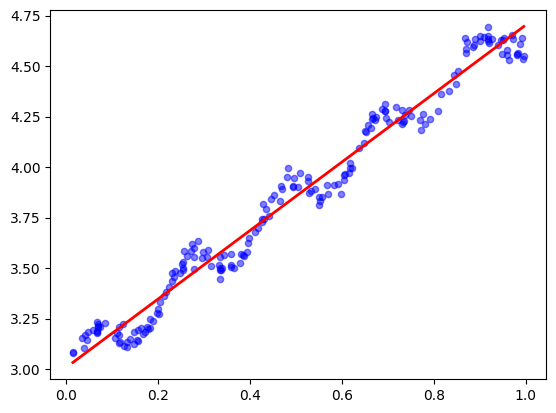

In [4]:
yHat = np.dot(xArr, ws)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xArr[:, 1], yArr, s=20, c='blue', alpha=0.5)
xCopy = xArr.copy()
xCopy.sort(axis=0)
yHat = np.dot(xCopy, ws)
ax.plot(xCopy[:, 1], yHat, color='red', linewidth=2)
plt.show()

In [7]:
yHat = np.dot(xArr, ws)
corrcoeff = np.corrcoef(yHat, yArr, rowvar=0)
print("相关系数:", corrcoeff)

相关系数: [[1.         0.98647356]
 [0.98647356 1.        ]]


### 8.2 Locally weighted linear regression

In [11]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    """
    局部加权线性回归函数
    :param testPoint: 测试点
    :param xArr: 特征矩阵
    :param yArr: 标签向量
    :param k: 布尔值，决定是否使用局部加权
    :return: 回归系数
    """
    xMat = np.mat(xArr) # 转换为矩阵
    yMat = np.mat(yArr).T # 转置为列向量
    m = np.shape(xMat)[0] # 样本数
    
    weights = np.mat(np.eye(m)) # 初始化权重矩阵
    
    for j in range(m):
        # 计算权重
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = np.exp(diffMat * diffMat.T / (-2.0 * k**2))
    
    xTx = xMat.T * (weights * xMat)
    
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    
    ws = xTx.I * (xMat.T * (weights * yMat))
    
    return testPoint * ws

In [9]:
def lwlrTest(testArr, xArr, yArr, k=1.0):
    """
    局部加权线性回归测试函数
    :param testArr: 测试数据集
    :param xArr: 特征矩阵
    :param yArr: 标签向量
    :param k: 布尔值，决定是否使用局部加权
    :return: 回归系数
    """
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    
    return yHat

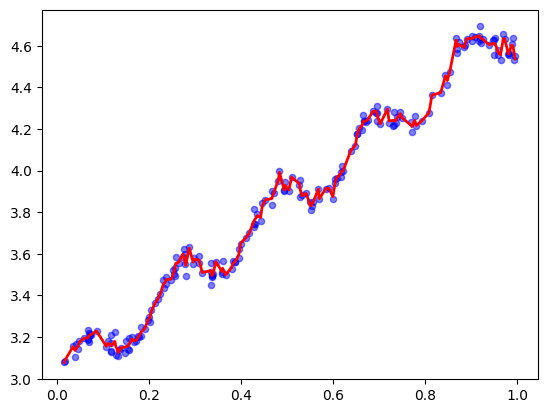

In [12]:
xArr, yArr = loadDataSet('ex0.txt')
yHat = lwlrTest(xArr, xArr, yArr, 0.003)
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0) # 排序索引
xSort = xMat[srtInd][:, 0, :] # 排序后的特征矩阵
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd], color='red', linewidth=2) # 局部加权线性回归曲线
ax.scatter(xArr[:, 1], yArr, s=20, c='blue', alpha=0.5) # 原始数据点
plt.show()

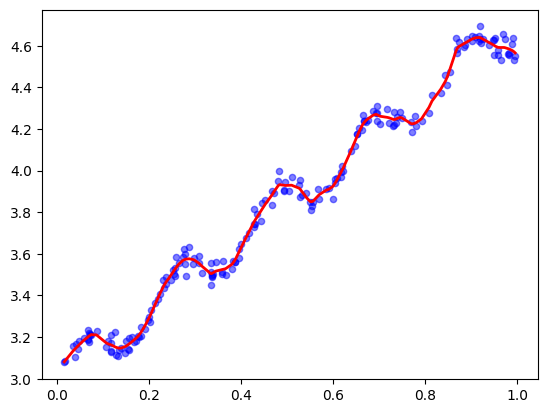

In [13]:
yHat = lwlrTest(xArr, xArr, yArr, 0.01)
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0) # 排序索引
xSort = xMat[srtInd][:, 0, :] # 排序后的特征矩阵
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd], color='red', linewidth=2) # 局部加权线性回归曲线
ax.scatter(xArr[:, 1], yArr, s=20, c='blue', alpha=0.5) # 原始数据点
plt.show()

### 8.3 Example: predicting the age of an abalone

In [14]:
def rssError(yArr, yHat):
    """
    计算RSS误差
    :param yArr: 标签向量
    :param yHat: 预测值
    :return: RSS误差
    """
    return np.sum((yArr - yHat) ** 2)

In [ ]:
abX, abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[0:100], abX[0:100], abY[0:100], 0.1)
yHat1 = lwlrTest(abX[0:100], abX[0:100], abY[0:100], 1.0)
yHat10 = lwlrTest(abX[0:100], abX[0:100], abY[0:100], 10.0)
print("k=0.1时的RSS误差:", rssError(abY[0:100], yHat01.T))
print("k=1.0时的RSS误差:", rssError(abY[0:100], yHat1.T))
print("k=10.0时的RSS误差:", rssError(abY[0:100], yHat10.T))

k=0.1时的RSS误差: 57.564678275611115
k=1.0时的RSS误差: 432.45978294045614
k=10.0时的RSS误差: 549.2561233945864


In [16]:
print("k=0.1时的RSS误差:", rssError(abY[100:200], yHat01.T))
print("k=1.0时的RSS误差:", rssError(abY[100:200], yHat1.T))
print("k=10.0时的RSS误差:", rssError(abY[100:200], yHat10.T))

k=0.1时的RSS误差: 2824.1904694547816
k=1.0时的RSS误差: 2163.4337549998654
k=10.0时的RSS误差: 2105.737390664906


In [17]:
ws = standRegress(abX[0:100], abY[0:100])
yHat = np.dot(abX[100:200], ws)
print("标准线性回归的RSS误差:", rssError(abY[100:200], yHat.T))

标准线性回归的RSS误差: 522.9809231589969


### 8.4 Shrinking coefficients to understand our data

##### 8.4.1 Ridge regression

In [26]:
def ridgeRegres(xMat, yMat, lam=0.2):
    """
    岭回归函数
    :param xMat: 特征矩阵
    :param yMat: 标签向量
    :param lam: 正则化参数
    :return: 回归系数
    """
    xTx = np.dot(xMat.T, xMat)
    denom = xTx + np.eye(np.shape(xTx)[0]) * lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    
    ws = np.dot(np.linalg.inv(denom), np.dot(xMat.T, yMat))
    
    return ws

In [34]:
def ridgeTest(xArr, yArr):
    """
    岭回归测试函数
    :param xArr: 特征矩阵
    :param yArr: 标签向量
    :param lam: 正则化参数
    :return: 回归系数
    """
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    
    yMean = np.mean(yMat, axis=0) # 均值
    yMat = yMat - yMean # 去均值
    xMeans = np.mean(xMat, axis=0) # 均值
    xVar = np.var(xMat, axis=0) # 方差
    xMat = (xMat - xMeans) / xVar # 标准化
    numTestPts = 30 # 测试点数
    wMat = np.zeros((numTestPts, np.shape(xMat)[1])) # 初始化权重矩阵
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, np.exp(i - 10))
        wMat[i, :] = ws.T
    
    return wMat

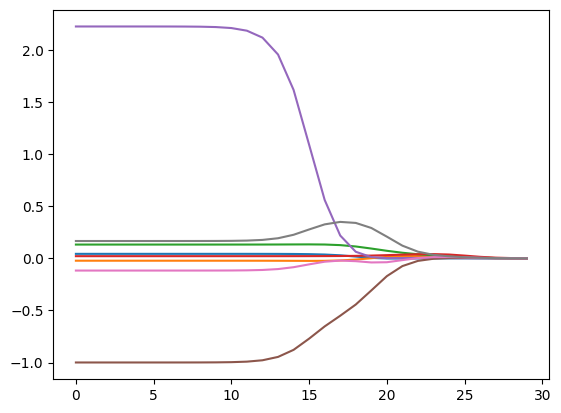

In [35]:
abX, abY = loadDataSet('abalone.txt')
ridgeWeights = ridgeTest(abX, abY)
fig= plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

##### 8.4.2 The lasso

##### 8.4.3 Forward stagewise regression

In [36]:
def regularize(xMat):
    """
    标准化函数
    :param xMat: 特征矩阵
    :return: 标准化后的特征矩阵
    """
    inMat = xMat.copy()
    meanVals = np.mean(inMat, axis=0)  # 计算均值
    stdVals = np.std(inMat, axis=0)    # 计算标准差
    inMat = (inMat - meanVals) / stdVals  # 标准化
    return inMat

def stageWise(xArr, yArr, eps=0.01, numIt=100):
    """
    阶段性线性回归函数
    :param xArr: 特征矩阵
    :param yArr: 标签向量
    :param eps: 步长
    :param numIt: 迭代次数
    :return: 回归系数
    """
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMat = yMat - np.mean(yMat, axis=0) # 去均值
    xMat = regularize(xMat) # 标准化
    m, n = np.shape(xMat) # 样本数和特征数
    returnMat = np.zeros((numIt, n)) # 初始化返回矩阵
    
    ws = np.zeros((n, 1)) # 初始化权重矩阵
    wsTest = ws.copy() # 测试权重矩阵
    wsMax = ws.copy() # 最大权重矩阵
    
    for i in range(numIt):
        lowestError = float('inf') # 初始化最低误差
        for j in range(n):
            for sign in [-1, 1]:
                wsTest[j] = ws[j] + sign * eps # 更新权重
                yTest = np.dot(xMat, wsTest) # 预测值
                rssE = rssError(yMat.A, yTest.A) # 计算RSS误差
                
                if rssE < lowestError: # 更新最低误差和最大权重矩阵
                    lowestError = rssE
                    wsMax = wsTest.copy()
        
        ws = wsMax.copy() # 更新权重矩阵
        returnMat[i, :] = ws.T
    
    return returnMat

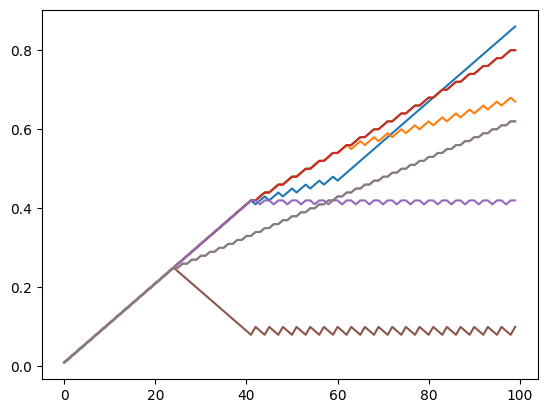

In [38]:
stageWise(abX, abY, 0.01, 200)
xMat = np.mat(abX)
yMat = np.mat(abY).T
xMat = regularize(xMat) # 标准化
yMat = yMat - np.mean(yMat, axis=0) # 去均值
weights = stageWise(xMat, yMat.T) # 阶段性线性回归
fig= plt.figure()
ax = fig.add_subplot(111)
ax.plot(weights)
plt.show()

### 8.5 The bias/variance tradeoff

### 8.6 Example: forecasting the price of LEGO sets